# KBO Dataset 불러오기

### About this file
- 1990년부터 2018년까지의 선수들의 기록을 바탕으로 다음 시즌의 AB 혹은 OPS를 예측할 수 있도록 구성되어 있습니다.

## 데이터 확인하기
1. 데이터 불러오기: pd.read_csv
2. 불러온 데이터 살펴보기: df.head()
3. 데이터 자료형 확인하기: type(df)
4. 데이터 크기 확인하기: df.shape
5. 데이터 컬럼 확인하기: df.columns
6. 데이터 컬럼별 자료형 및 갯수 확인하기: df.info()

## 데이터 전처리
1. 누락값 확인 및 처리하기: dropna()
2. 연도별 데이터 수 확인 및 사용할 연도 결정: 최근 10년
3. 컬럼 성격 분석 및 사용할 컬럼 결정


In [1]:
import pandas as pd
df = pd.read_csv('KBO_archive/2019_kbo_for_kaggle_v2.csv')

In [48]:
df.describe()

,age,G,PA,AB,R,H,2B,3B,HR,TB,...,war,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,...,1913.000000,1913.000000,1913.000000,1899.000000,1901.000000,1899.000000,1899.000000,1913.000000,1913.000000,1898.000000
mean,26.879247,79.353894,261.762154,228.465238,33.994773,64.009409,11.328280,1.098798,6.357031,96.606377,...,1.290965,45.225301,27.546785,0.247854,0.318248,0.361953,0.679483,2012.032410,240.537376,0.678652
std,4.543899,44.224675,195.957729,170.588573,29.155530,52.965894,10.182175,1.760849,8.454875,84.708232,...,1.841447,36.955290,24.357927,0.089357,0.101919,0.154357,0.241919,6.024791,170.187193,0.219826
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.616000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1991.000000,0.000000,0.000000
25%,24.000000,39.000000,64.000000,56.000000,8.000000,12.000000,2.000000,0.000000,0.000000,17.000000,...,-0.047000,9.000000,5.000000,0.219000,0.289000,0.294500,0.589000,2008.000000,70.000000,0.592000
50%,27.000000,91.000000,254.000000,221.000000,28.000000,57.000000,9.000000,0.000000,3.000000,81.000000,...,0.514000,41.000000,22.000000,0.262000,0.333000,0.372000,0.706000,2014.000000,245.000000,0.704000
75%,30.000000,119.000000,441.000000,383.000000,54.000000,109.000000,19.000000,2.000000,9.000000,162.000000,...,2.305000,76.000000,44.000000,0.295000,0.371000,0.447500,0.813000,2017.000000,395.000000,0.809000
max,41.000000,144.000000,672.000000,576.000000,135.000000,201.000000,47.000000,17.000000,54.000000,373.000000,...,10.873000,142.000000,124.000000,1.000000,1.000000,3.000000,4.000000,2019.000000,576.000000,2.000000


In [2]:
print(df.head())

  batter_name   age     G     PA     AB     R     H   2B   3B    HR  ...  tp  \
0         백용환  24.0  26.0   58.0   52.0   4.0   9.0  4.0  0.0   0.0  ...  포수   
1         백용환  25.0  47.0   86.0   79.0   8.0  14.0  2.0  0.0   4.0  ...  포수   
2         백용환  26.0  65.0  177.0  154.0  22.0  36.0  6.0  0.0  10.0  ...  포수   
3         백용환  27.0  80.0  199.0  174.0  12.0  34.0  7.0  0.0   4.0  ...  포수   
4         백용환  28.0  15.0   20.0   17.0   2.0   3.0  0.0  0.0   0.0  ...  포수   

     1B   FBP    avg    OBP    SLG    OPS  p_year    YAB   YOPS  
0   5.0   6.0  0.173  0.259  0.250  0.509    2014   79.0  0.580  
1   8.0   5.0  0.177  0.226  0.354  0.580    2015  154.0  0.784  
2  20.0  20.0  0.234  0.316  0.468  0.784    2016  174.0  0.581  
3  23.0  20.0  0.195  0.276  0.305  0.581    2017   17.0  0.476  
4   3.0   3.0  0.176  0.300  0.176  0.476    2018   47.0  0.691  

[5 rows x 37 columns]


In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
print(df.shape)

(1913, 37)


In [5]:
print(df.columns)

Index(['batter_name', 'age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'GB', 'SO', 'GDP', 'BU', 'fly', 'year',
       'salary', 'war', 'year_born', 'hand2', 'cp', 'tp', '1B', 'FBP', 'avg',
       'OBP', 'SLG', 'OPS', 'p_year', 'YAB', 'YOPS'],
      dtype='object')


| index | Column <br> Name | 설명 | index | Column <br> Name | 설명 | index | Column <br> Name | 설명 | index | Column <br> Name | 설명 |
|:---:|:---:|:---|:---:|:---:|:---|:---:|:---:|:---|:---:|:---:|:---|
| **1** | batter_name | 선수 이름 | **11** | TB | 총 루타 수 |  **21** | fly | 희생 플라이 |  **31** | avg | 타율 |  
| **2** | age | 나이 | **12** | RBI | 타점 |  **22** | year | 해당 시즌 |  **32** | OBP | 출루율 |  
| **3** | G  | 경기 수 | **13** | SB | 도루 성공 | **23** | salary | 해당 시즌의 연봉 |  **33** | SLG | 장타율 |  
| **4** | PA | 타수 | **14** | CS | 도루 실패 |  **24** | war | 대체 선수 대비 승리 기여도 |  **34** | OPS | OBP + SLG | 
| **5** | AB  | 타석 수 | **15** | BB  | 볼넷 수 |  **25** | year_born | 선수 태어난 연도 |  **35** | p_year | 다음 시즌 |  
| **6** | R  | 득점 | **16** | HBP | 몸에 맞은 공 |  **26** | hand2 | 타석 위치 |  **36** | YAB | 다음 시즌 타석 수 |  
| **7** | H  | 안타 | **17** | GB | 고의4구 |  **27** | cp | 최근 포지션 |  **37** | YOPS | 다음 시즌 OPS |  
| **8** | 2B | 2루타 | **18** | SO | 삼진 |  **28** | tp | 통합 포지션 |  |  |  |  
| **9** | 3B | 3루타 | **19** | GDP | 병살 | **29** | 1B | 1루타 |  |  |  |  
| **10** | HR | 홈런 | **20** | BU | 희생타 | **30** | FBP | BB + HBP |  |  |  |  










batter_name 선수 이름
age 나이
G 경기 수
PA 타수
AB 타석 수
R 득점
H 안타
2B 2루타
3B 3루타
HR 홈런
TB 총 루타 수
RBI 타점
SB 도루 성공
CS 도루 실패
BB 볼넷 수
HBP 몸에 맞은 공
GB 고의4구
SO 삼진
GDP 병살
BU 희생타
fly 희생 플라이
year 해당 시즌
salary 해당 시즌의 연봉
war 대체 선수 대비 승리 기여도
year_born 선수 태어난 연도
hand2 타석 위치
cp 최근 포지션
tp 통합 포지션
1B 1루타
FBP BB + HBP
avg 타율
OBP 출루율
SLG 장타율
OPS OBP + SLG
p_year 다음 시즌
YAB 다음 시즌 타석 수
YOPS 다음 시즌 OPS

In [50]:
#print(df.dtypes)

In [51]:
#print(df.info())

In [52]:
#print(df.count())

In [9]:
num_rows = df.shape[0]
num_missing = num_rows - df.count()
print(num_missing)

batter_name     0
age             0
G               0
PA              0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
TB              0
RBI             0
SB              0
CS              0
BB              0
HBP             0
GB              0
SO              0
GDP             0
BU              0
fly             0
year            0
salary          0
war             0
year_born       0
hand2           0
cp              0
tp              0
1B              0
FBP             0
avg            14
OBP            12
SLG            14
OPS            14
p_year          0
YAB             0
YOPS           15
dtype: int64


In [10]:
import numpy as np
print(np.count_nonzero(df.isnull()))

69


In [49]:
#print(df[(df['avg'].isnull()) == True])

In [12]:
print(np.count_nonzero(df['avg'].isnull()))
print(np.count_nonzero(df['OBP'].isnull()))
print(np.count_nonzero(df['SLG'].isnull()))
print(np.count_nonzero(df['OPS'].isnull()))
print(np.count_nonzero(df['YOPS'].isnull()))

14
12
14
14
15


In [13]:
df_dropna = df.dropna()
print(df.shape)
print(df_dropna.shape)
print(df.shape[0] - df_dropna.shape[0])

(1913, 37)
(1885, 37)
28


In [14]:
print(df.groupby('year')['salary'].mean())

year
1990     2400.000000
1991     2400.000000
1992     2400.000000
1993     2400.000000
1994     2400.000000
1995     2400.000000
1996     2400.000000
1997     2990.000000
1998     3405.263158
1999     4119.047619
2000     5580.000000
2001     5806.250000
2002     6602.631579
2003     6509.302326
2004     7266.666667
2005     8011.111111
2006     8058.636364
2007     9752.941176
2008    10667.721519
2009    10012.643678
2010    11723.238636
2011    11851.000000
2012    13712.605042
2013    14792.800000
2014    16932.330827
2015    20183.229814
2016    18331.952663
2017    20575.141243
2018    21425.641026
Name: salary, dtype: float64


In [15]:
print(df.groupby(['year', 'batter_name'])['salary'].mean())

year  batter_name
1990  김병수              2400
      김재상              2400
      김종헌              2400
      심재원              2400
      오대석              2400
                      ...  
2018  홍재호              3500
      홍창기              2700
      황윤호              3100
      황재균            120000
      황진수              6200
Name: salary, Length: 1913, dtype: int64


In [16]:
print(df['batter_name'].nunique())

338


In [17]:
print(df.groupby('year')['batter_name'].nunique())

year
1990      9
1991      6
1992      4
1993      4
1994      5
1995      8
1996     12
1997     15
1998     19
1999     21
2000     25
2001     32
2002     38
2003     43
2004     51
2005     54
2006     66
2007     68
2008     79
2009     87
2010     88
2011    100
2012    119
2013    125
2014    133
2015    161
2016    169
2017    177
2018    195
Name: batter_name, dtype: int64


In [18]:
print(df['batter_name'].drop_duplicates())

0        백용환
6        신범수
7        김민식
11       한승택
14       황윤호
        ... 
1880     이상훈
1884     이승엽
1897     이원석
1909     조용호
1911    히메네스
Name: batter_name, Length: 338, dtype: object


In [19]:
salary = df['salary']

In [20]:
salary.max()

250000

In [21]:
salary.mean()

14112.13538944067

In [22]:
salary[salary > salary.mean()]

10      15000
23      18000
26      28000
31      20000
32      15000
        ...  
1906    15000
1907    30000
1908    30000
1911    50000
1912    50000
Name: salary, Length: 507, dtype: int64

# Seaborn 라이브러리 활용 데이터 시각화

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Salary Histogram with Density Plot')

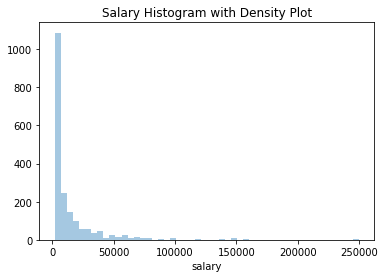

In [24]:
ax = plt.subplots()
#ax = sns.distplot(df['salary'])
ax = sns.distplot(df['salary'], kde=False)
ax.set_title('Salary Histogram with Density Plot')

Text(0, 0.5, 'Salary')

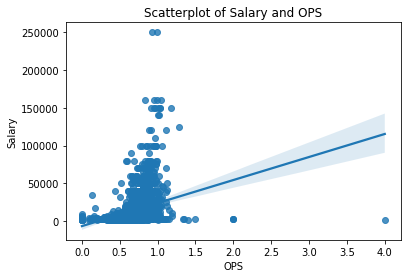

In [25]:
ax1 = plt.subplots()
ax1 = sns.regplot(x='OPS', y='salary', data=df)
ax1.set_title('Scatterplot of Salary and OPS')
ax1.set_xlabel('OPS')
ax1.set_ylabel('Salary')

- 연봉은 OPS와 밀접한 관계를 보임

Text(0, 0.5, 'Salary')

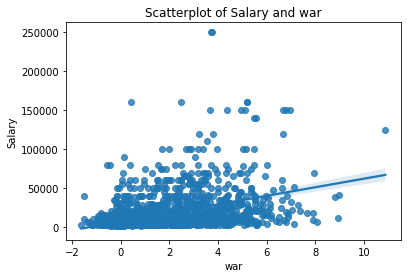

In [26]:
ax1 = plt.subplots()
ax1 = sns.regplot(x='war', y='salary', data=df)
ax1.set_title('Scatterplot of Salary and war')
ax1.set_xlabel('war')
ax1.set_ylabel('Salary')

> **WAR(대체선수 대비 승리기여도, Wins Above Replacement)**는 리그에 평균적인 대체선수에 비해 팀 승리에 얼마나 기여했는지 보여주는 지표다. 타격이나 수비 등 하나의 기록으로 평가하는 지표가 아니라 한 선수가 기록한 거의 전 종목 성적을 가지고 계산하는데, **가장 공신력 있는 세이버메트릭스 통계량으로 인정**받고 있다.

- 라고 하는데, WAR과 연봉은 거의 상관관계가 없어 보임.
- 연봉 산정 기준이 무엇일까요???

Text(0, 0.5, 'Salary')

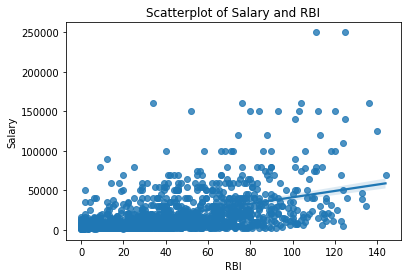

In [27]:
ax1 = plt.subplots()
ax1 = sns.regplot(x='RBI', y='salary', data=df)
ax1.set_title('Scatterplot of Salary and RBI')
ax1.set_xlabel('RBI')
ax1.set_ylabel('Salary')

- 연봉은 타점과도 큰 관련이 없음

Text(0, 0.5, 'Salary')

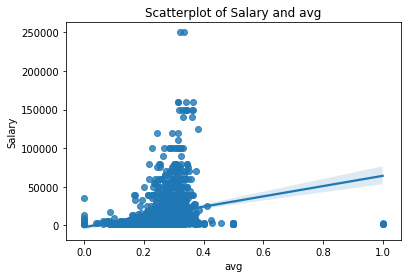

In [28]:
ax1 = plt.subplots()
ax1 = sns.regplot(x='avg', y='salary', data=df)
ax1.set_title('Scatterplot of Salary and avg')
ax1.set_xlabel('avg')
ax1.set_ylabel('Salary')

- 연봉이 타율과는 관련이 있는 듯이 보임
- 아직도 전통적 지표를 활용하는 듯함

Text(0, 0.5, 'OPS')

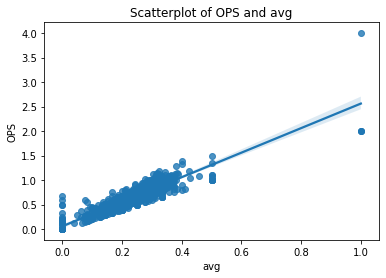

In [29]:
ax1 = plt.subplots()
ax1 = sns.regplot(x='avg', y='OPS', data=df)
ax1.set_title('Scatterplot of OPS and avg')
ax1.set_xlabel('avg')
ax1.set_ylabel('OPS')

- OPS와 avg는 선형에 가까운 밀접한 관계를 보임

Text(0, 0.5, 'war')

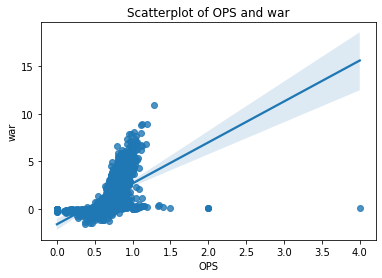

In [30]:
ax1 = plt.subplots()
ax1 = sns.regplot(x='OPS', y='war', data=df)
ax1.set_title('Scatterplot of OPS and war')
ax1.set_xlabel('OPS')
ax1.set_ylabel('war')

Text(0, 0.5, 'year')

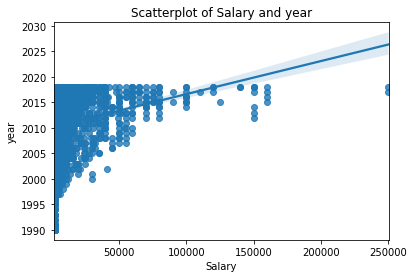

In [31]:
ax1 = plt.subplots()
ax1 = sns.regplot(x='salary', y='year', data=df)
ax1.set_title('Scatterplot of Salary and year')
ax1.set_xlabel('Salary')
ax1.set_ylabel('year')

(0, 60000)

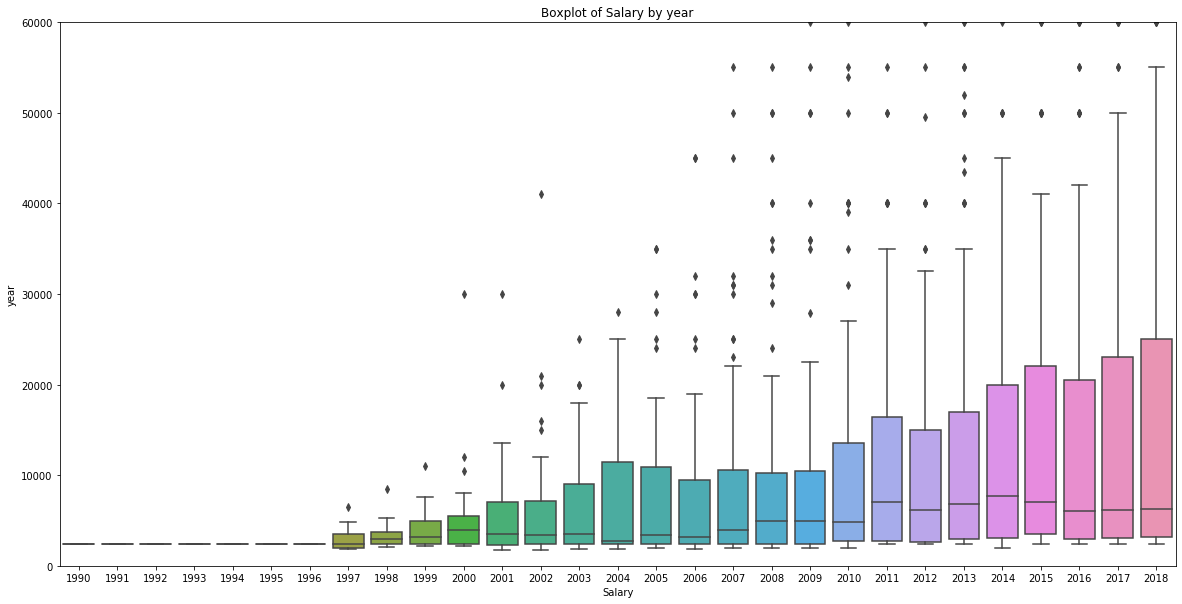

In [80]:
#plt.figure(figsize=(20,5))

ax2= plt.subplots(figsize=(20,10))
ax2 = sns.boxplot(x='year', y='salary', data=df)
ax2.set_title('Boxplot of Salary by year')
ax2.set_xlabel('Salary')
ax2.set_ylabel('year')

plt.ylim([0, 60000])
                                                   

In [82]:
y_war = df.groupby('age').war.mean()
x_age = df.groupby('age')
#print(y_war)
y_ops = df.groupby('age').OPS.mean()
print(y_ops)

age
18.0    0.421909
19.0    0.524027
20.0    0.617716
21.0    0.652414
22.0    0.629646
23.0    0.611124
24.0    0.644974
25.0    0.652767
26.0    0.682843
27.0    0.683259
28.0    0.704213
29.0    0.684297
30.0    0.749374
31.0    0.756000
32.0    0.735816
33.0    0.760085
34.0    0.743140
35.0    0.764676
36.0    0.779690
37.0    0.771250
38.0    0.732000
39.0    0.823833
40.0    0.780800
41.0    0.632667
Name: OPS, dtype: float64


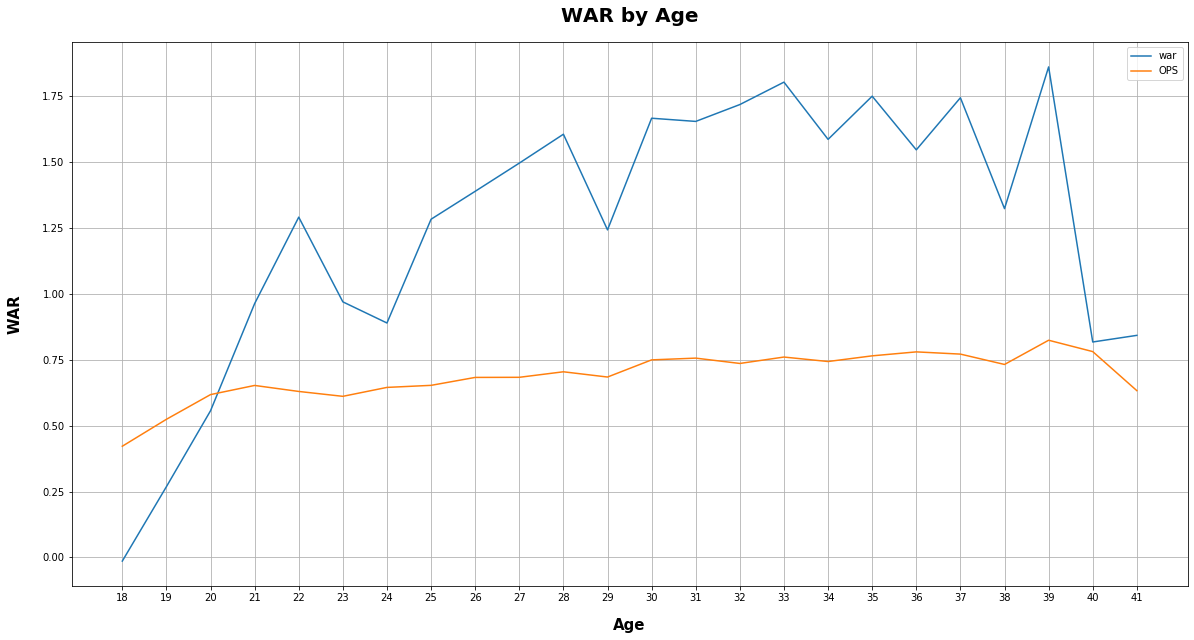

In [90]:
ax= plt.subplots(figsize=(20,10))
ax = y_war.plot.line()
ax = y_ops.plot.line()

ax.set_title('WAR by Age', pad=20, fontdict={'weight': 'bold', 'size': 20})
ax.set_xlabel('Age', labelpad=15, fontdict={'weight': 'bold', 'size': 15})
ax.set_ylabel('WAR', labelpad=20, fontdict={'weight': 'bold', 'size': 15})

plt.xticks(np.arange(18, 42))
plt.grid()
plt.legend()
plt.show()

(0, 60000)

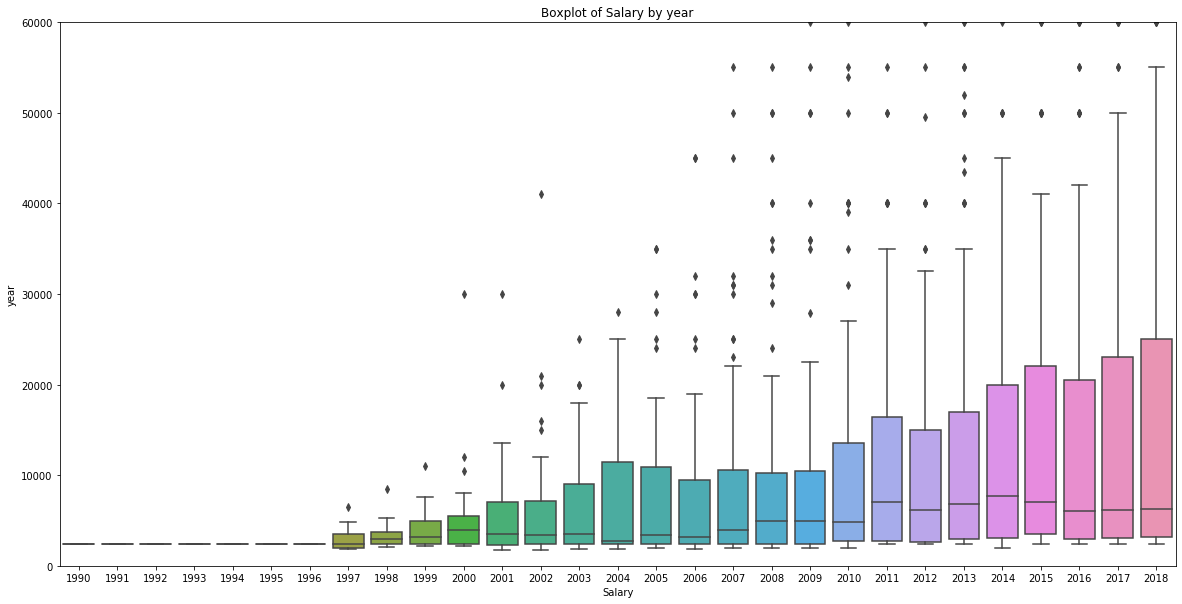

In [64]:
age_war = df

ax3= plt.subplots(figsize=(20,10))
ax2 = sns.boxplot(x='year', y='salary', data=df)
ax2.set_title('Boxplot of Salary by year')
ax2.set_xlabel('Salary')
ax2.set_ylabel('year')

plt.ylim([0, 60000])